# Proyecto Final de Data Science con Phyton
## Modelo Predictivo de Precios de Casas con Regresión Líneal
### Luis Edmundo Alvarez Soto Carné 21001844

In [1]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
#pip install scikit-learn
#import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
def f_spgraph(p_x, p_y,p_title,p_xlabel, p_ylabel):
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = p_x, y = p_y, color = 'mediumseagreen')
    plt.title(p_title, fontdict = {'fontsize':15})
    maxDist = max(max(p_y), max(p_x)) 
    minDist = min(min(p_y), min(p_x)) 
    plt.xlabel(p_xlabel, fontdict= {'fontsize':13})
    plt.ylabel(p_ylabel, fontdict= {'fontsize':13})
    plt.tight_layout();

In [3]:
#importar archivo
datos = np.load("proyecto_training_data.npy")

In [4]:
# Transformación del data set en un data frame
df = pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
  
# print DataFrame
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


## Análisis Exploratorio de datos en el DataFrame

In [5]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Gráficas de cada Variable

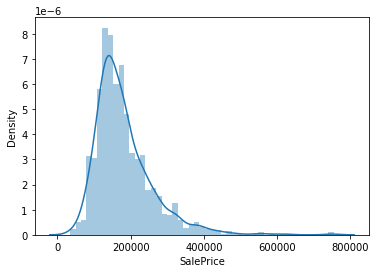

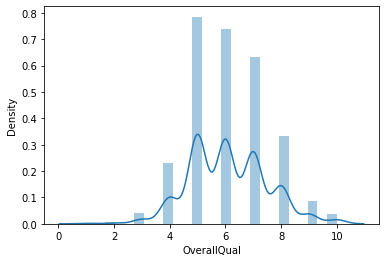

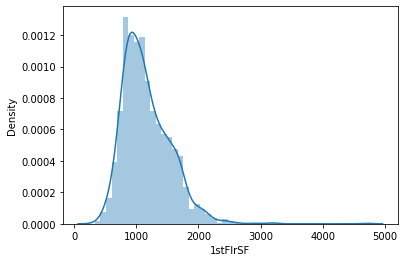

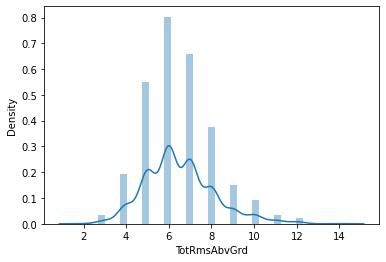

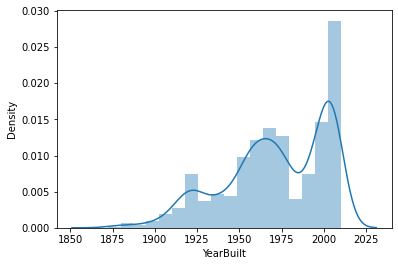

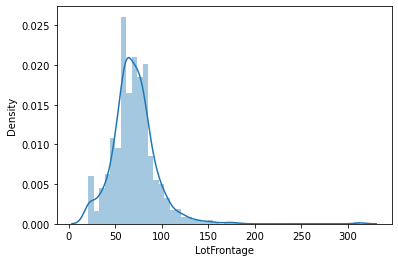

In [6]:
# desactiva mensajes futureWarnings
import warnings
warnings.filterwarnings("ignore")
# create distplots
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])

## Coeficiente de correlación entre el Precio y demás variables

In [7]:
from scipy import stats
from scipy.stats import pearsonr
    

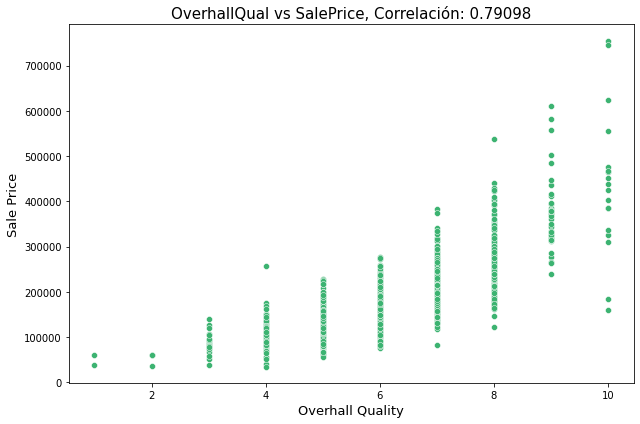

In [8]:
v_corr_oq = round(df['SalePrice'].corr(df['OverallQual'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['OverallQual'],'SalePrice vs OverhallQual, Correlación: '+ str(v_corr_oq),'Sale Price', 'Overhall Quality')
f_spgraph(df['OverallQual'],df['SalePrice'], 'OverhallQual vs SalePrice, Correlación: '+ str(v_corr_oq), 'Overhall Quality','Sale Price')

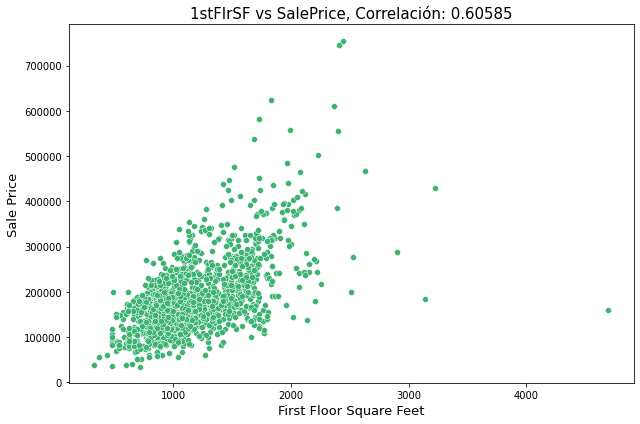

In [9]:
v_corr_ff = round(df['SalePrice'].corr(df['1stFlrSF'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['1stFlrSF'],'SalePrice vs 1stFlrSF, Correlación: '+ str(v_corr_ff),'Sale Price', 'First Floor Square Feet')
f_spgraph(df['1stFlrSF'],df['SalePrice'],'1stFlrSF vs SalePrice, Correlación: '+ str(v_corr_ff), 'First Floor Square Feet','Sale Price')

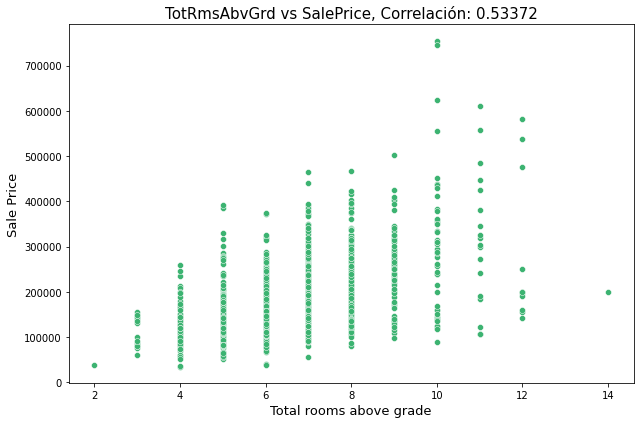

In [10]:
v_corr_ar = round(df['SalePrice'].corr(df['TotRmsAbvGrd'], method='pearson'),5)
f_spgraph(df['TotRmsAbvGrd'],df['SalePrice'], 'TotRmsAbvGrd vs SalePrice, Correlación: '+ str(v_corr_ar),'Total rooms above grade', 'Sale Price')

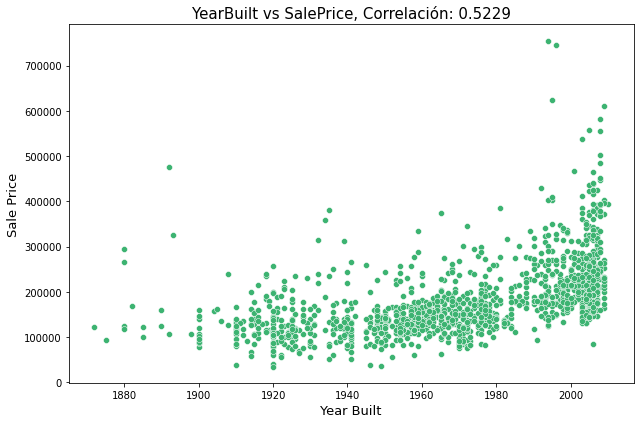

In [11]:
v_corr_yb = round(df['SalePrice'].corr(df['YearBuilt'], method='pearson'),5)
f_spgraph(df['YearBuilt'],df['SalePrice'],'YearBuilt vs SalePrice, Correlación: '+ str(v_corr_yb), 'Year Built','Sale Price')

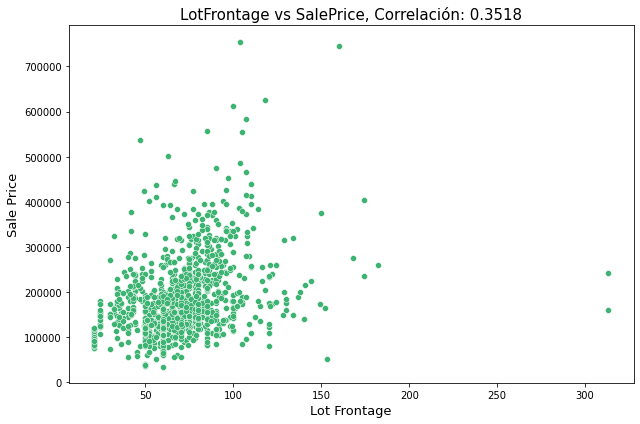

In [12]:
v_corr_lf = round(df['SalePrice'].corr(df['LotFrontage'], method='pearson'),5)
f_spgraph(df['LotFrontage'],df['SalePrice'],'LotFrontage vs SalePrice, Correlación: '+ str(v_corr_lf), 'Lot Frontage','Sale Price')

**Nota** las variables con más correlación respecto al Sale Price son: *Overhall Quality (0.79098) y First Floor Square feet (0.60585)*

## Separación del Set de Datos para Entrenamiento y de Pruebas 

In [13]:
#verificación de tamaño de archivo
numrows, numcols = datos.shape;
trainrows = int(numrows * 0.8);
testrows1 = int(numrows * 0.2);
print("shape of data:",df.shape)
print("TrainRows: ",numrows,trainrows)
print("TestRows: ",numrows,testrows1)
print("Cols: ",numcols)

shape of data: (1460, 6)
TrainRows:  1460 1168
TestRows:  1460 292
Cols:  6


In [14]:
print(df[:trainrows])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [15]:
print(df[testrows1:])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
292    131000.0          5.0    1148.0           8.0     1949.0         60.0
293    235000.0          7.0    1468.0           9.0     1977.0          NaN
294    167000.0          6.0    1644.0           7.0     1953.0         80.0
295    142500.0          6.0    1003.0           6.0     1984.0         37.0
296    152000.0          5.0     910.0           6.0     1950.0         75.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1168 rows x 6 columns]


In [16]:
datatrain = df[:trainrows]
datatest = df[trainrows:]
print("shape of datatrain:",datatrain.shape)
print("shape of datatest:",datatest.shape)


shape of datatrain: (1168, 6)
shape of datatest: (292, 6)


### Función de entrenamiento del Modelo de Regresión líneal y = mx + b

#### Función que agrega columna de 1

In [17]:
def f_matrizunos(x):
    filas=np.shape(x)
    
    #print(filas)
    s = (filas[0],2)
    #print("s",s)
    v_m = np.ones(s)
    for i in range(len(v_m)):
        v_m[i][0] = v_m[i][0] * x[i]
    #v_m = np.ones(s)
    return v_m

#### Función de entrenamiento del Modelo

In [18]:
def f_trainlr(x, y, epochs, ierror, lr, m, b):
    # inicializa vector de parámetros con m y b igual a cero
    v_param = np.array([m,b])
    # Crea matriz de entranimiento con columna concatenada con valores 1 para poder utilizar Matmul
    m_train = f_matrizunos(x)
    #Diccionario para modelo resultante
    d_param = {}
    #vector del promedio de errores
    v_errores = []
    for epoch in range(0,epochs+1):
        # Mutiplica la matriz de entramiento con el vector de parámetros
        yhat = np.matmul(m_train,v_param)

        # Resta de valor estimado (yhat) & valor esperado y
        yhat_y = np.subtract(yhat,y)

        # calcula error
        error = np.power(yhat_y,2)/2

        # calcula promedio del error de la iteración
        erravg = np.mean(error)
        # agrega el error al vector
        v_errores.append(erravg)

        # calcula gradientes de m y b
        gradm = np.mean(x* yhat_y)*lr
        gradb = np.mean(yhat_y)*lr
        v_grad = np.array([gradm,gradb])
        
        # asigna nuevos parámetros a la siguiente iteración
        v_param = v_param - v_grad

        # agrega vector de parámetro al diccionario
        d_param[epoch+1] = v_param

        # evalúa si imprime o no la iteración y el promedio del error
        if epoch % ierror == 0:
            print("Iteración y error: ", epoch,erravg)
    return d_param, v_errores


#### Función para graficar

In [19]:
def f_plotgraph(px,py,ptitle,pxlabel,pylabel):
    plt.plot(np.linspace(0,len(py),len(py)),px)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    plt.show()

#### Ejecuta modelo con OverallQual vs SalePrice

Iteración y error:  0 19409722053.22175
Iteración y error:  300000 1387826033.0265605


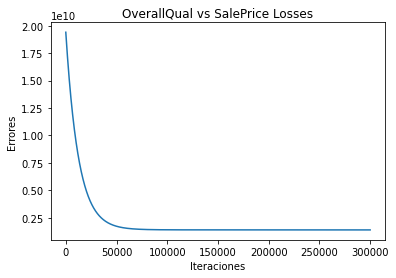

In [20]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['OverallQual'], datatrain['SalePrice'], 300000, 300000, 0.000001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'OverallQual vs SalePrice Losses','Iteraciones','Errores')

#### Ejecuta modelo con 1stFlrSF vs SalePrice

Iteración y error:  0 19409722053.22175
Iteración y error:  1000 1968084869.9299588


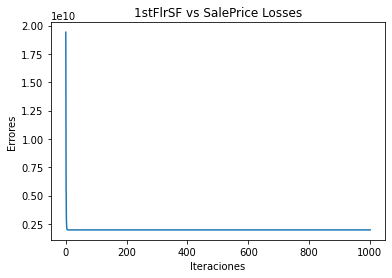

In [21]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['1stFlrSF'], datatrain['SalePrice'], 1000, 1000, 0.000001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'1stFlrSF vs SalePrice Losses','Iteraciones','Errores')

## Gráficas de la evolución del modelo entrenado

#### Función para graficar

In [22]:
def f_regresiongraph(p_x,p_y,p_d, n):
    lp = np.linspace(0,np.max(p_x)+1,100)
    for i in range(0,len(p_d),n):
        fx = p_d[i+1][0] * lp + p_d[i+1][1]
#       plt.scatter(p_x,p_y/1000)
        plt.scatter(p_x,p_y)
        plt.plot(lp,fx, 'r')
        plt.title("Iteración: " + str(i))
        plt.xlabel(str(p_x.name))
        plt.ylabel(str(p_y.name))
        plt.show()

In [23]:
p_param1, p_errores1 = f_trainlr(datatrain['OverallQual'], datatrain['SalePrice'], 300000, 50000, 0.00001, 0,0)

Iteración y error:  0 19409722053.22175
Iteración y error:  50000 1383306386.428938
Iteración y error:  100000 1372374767.9042723
Iteración y error:  150000 1361948670.760213
Iteración y error:  200000 1352004717.6839066
Iteración y error:  250000 1342520612.4221284
Iteración y error:  300000 1333475089.7887993


#### Grafica parámetros encontrados en el entrenamiento de la función con OverallQual vs SalePrice

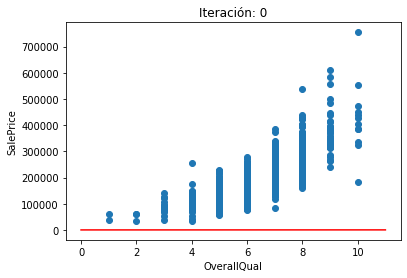

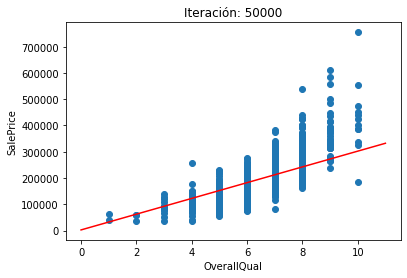

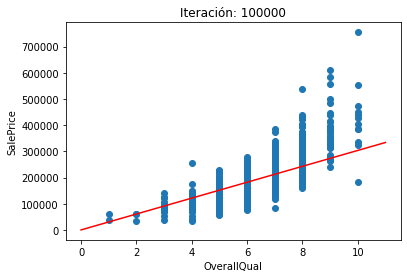

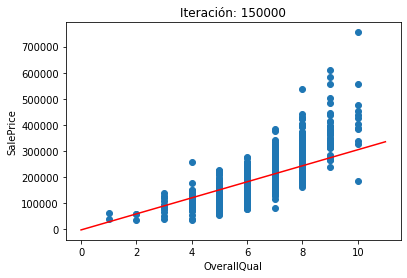

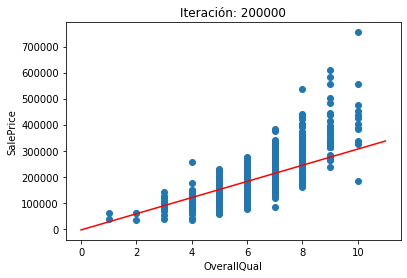

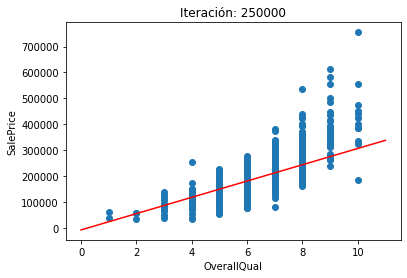

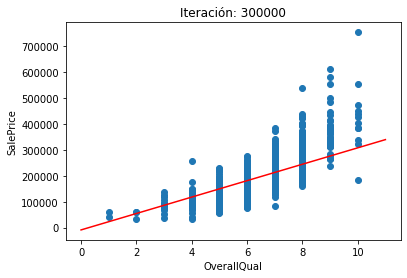

In [24]:
f_regresiongraph(datatrain['OverallQual'], datatrain['SalePrice'],p_param1,50000)

In [25]:
p_param2, p_errores2 = f_trainlr(datatrain['1stFlrSF'], datatrain['SalePrice'], 1000, 100, 0.000001, 0,0)

Iteración y error:  0 19409722053.22175
Iteración y error:  100 1968092264.8703756
Iteración y error:  200 1968091443.1481895
Iteración y error:  300 1968090621.4415395
Iteración y error:  400 1968089799.7504246
Iteración y error:  500 1968088978.0748446
Iteración y error:  600 1968088156.4147992
Iteración y error:  700 1968087334.7702882
Iteración y error:  800 1968086513.1413114
Iteración y error:  900 1968085691.527868
Iteración y error:  1000 1968084869.9299588


#### Grafica parámetros encontrados en el entrenamiento de la función con 1stFlrsf  vs SalePrice

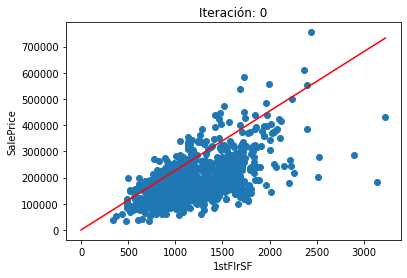

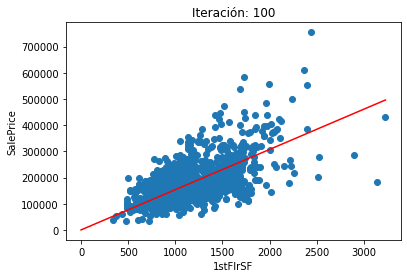

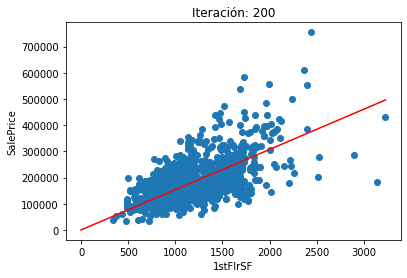

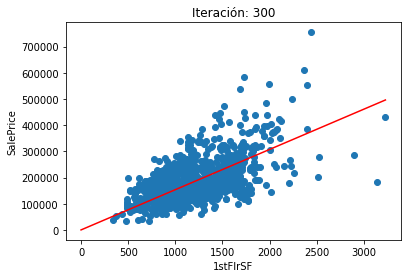

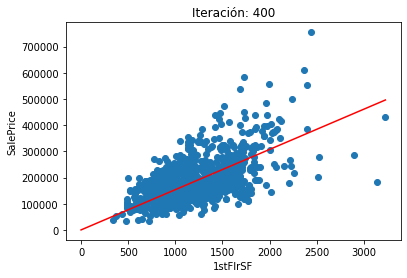

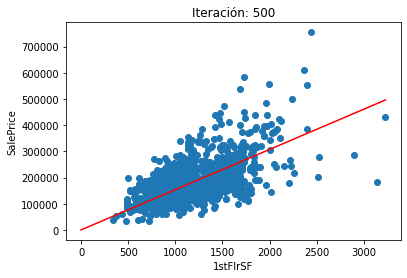

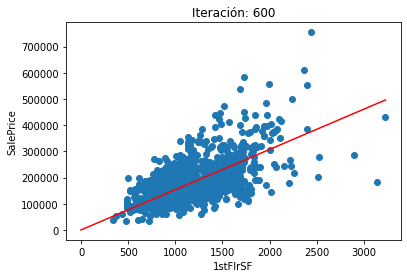

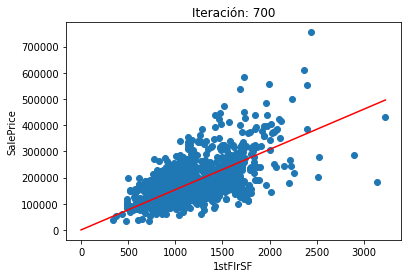

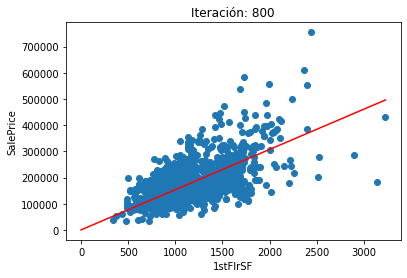

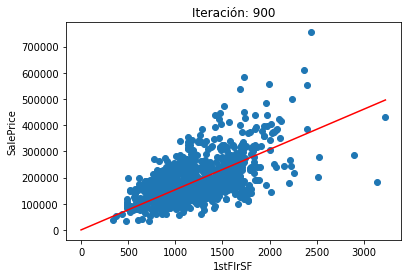

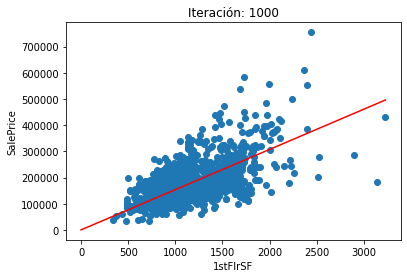

In [26]:
f_regresiongraph(datatrain['1stFlrSF'], datatrain['SalePrice'],p_param2,100)

### Entrenamiento de Variables "x" seleccionadas con scikit-learn

In [27]:
#Función para predicciones
def f_prediccion(p_skmodel, p_tdmodel, p_dftest):
    #calcula predicción del modelo con el data test y el último valor de m y p entrenados manualmente
    m_value = np.array(p_tdmodel[len(p_tdmodel)][0])
    b_value = np.array(p_tdmodel[len(p_tdmodel)][1])
    m_predict = np.array(m_value * p_dftest + b_value)
    
    # calcula predicción o estimación con scikit-learn del modelo del data test
    skpredict = p_skmodel.predict(pd.DataFrame(p_dftest))
    skpredict = skpredict.transpose()
    skpredict = np.reshape(skpredict, testrows1) #292

    #calcula promedio
    v_avg = (skpredict + m_predict)
    
    return skpredict, m_predict, v_avg

In [28]:
def f_error(p_yhat, p_y):
    # Resta de valor estimado (yhat) & valor esperado y
    yhat_y = np.subtract(p_yhat,p_y)

    # calcula error
    error = np.power(yhat_y,2)/2

    # calcula promedio del error de la iteración
    erravg = np.mean(error)
    return erravg


In [29]:
# Entrenar el modelo, usando los sets de datos OverallQual vs SalePrice que son para entrenamiento
d_overallQual = pd.DataFrame(datatrain['OverallQual'])
d_saleprice = pd.DataFrame(datatrain['SalePrice'])
r_overallQual = LinearRegression().fit(d_overallQual, d_saleprice)

#Predicciones para OverallQual vs SalePrice
sk_predOQ, m_predOQ, promedio = f_prediccion(r_overallQual, p_param1, datatest['OverallQual'])

# Calculo de error para cada uno de los modelos
sk_errorOQ = f_error(sk_predOQ, datatest['SalePrice'])
m_errorOQ = f_error(m_predOQ, datatest['SalePrice'])
print(sk_errorOQ, m_errorOQ)

1315091304.4743197 1503304484.4751377


In [30]:
# Entrenar el modelo, usando los sets de datos First Floor Square Feet vs SalePrice que son para entrenamiento
d_1stFlrSF = pd.DataFrame(datatrain['1stFlrSF'])
d_saleprice = pd.DataFrame(datatrain['SalePrice'])
r_1stFlrSF = LinearRegression().fit(d_1stFlrSF, d_saleprice)

#Predicciones para 1stFlrSF vs SalePrice
sk_pred1F, m_pred1F, promedio = f_prediccion(r_1stFlrSF, p_param2, datatest['1stFlrSF'])

# Calculo de error para cada uno de los modelos
sk_error1F = f_error(sk_pred1F, datatest['SalePrice'])
m_error1F = f_error(m_pred1F, datatest['SalePrice'])
print(sk_error1F, m_error1F)

2292769137.345937 2437895457.642999


In [31]:
#Creacion de listas con los valores de error para cada uno de los modelos
errorSK = [round(sk_errorOQ,5), round(sk_error1F,5)]

errorMl = [round(m_errorOQ,5),round(m_error1F,5)]

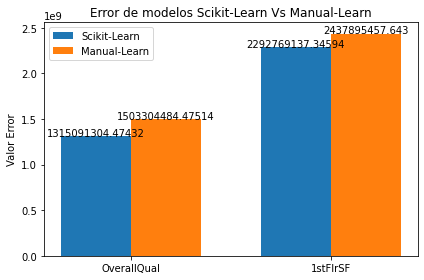

In [32]:
#Grafica de barras
fig, ax = plt.subplots()

# ancho de cada barra
width = 0.35

#Se obtiene la posición de cada etiqueta para el eje X
r1 = np.arange(len(errorSK))

bar1 = ax.bar(r1-width/2, errorSK, width, label='Scikit-Learn')
bar2 = ax.bar(r1+width/2, errorMl, width, label='Manual-Learn')

#etiquetas para cada barra
ax.set_ylabel('Valor Error')
ax.set_title('Error de modelos Scikit-Learn Vs Manual-Learn')

#Etiquetas de identificacion de valores en el grafico
ax.set_xticks(r1)
ax.set_xticklabels(('OverallQual', '1stFlrSF'))
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(bar1)
autolabel(bar2)
fig.tight_layout()

#muestra la gráfica
plt.show()